In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import os, sys
import matplotlib.pyplot as plt


In [29]:
# read the rf_pred.csv file
rf_pred = pd.read_csv("rf_pred.csv")

In [30]:
# filter out participant 27 
rf_pred = rf_pred[rf_pred['subject'] == 27]

# # get all the row from 22h 2022-04-16 to 11h 2022-04-17
rf_pred = rf_pred[(rf_pred['datetime'] >= '2022-04-16 22:00:00')]
rf_pred = rf_pred[(rf_pred['datetime'] <= '2022-04-17 11:00:00')]
# # sort the dataframe by datetime
# rf_pred = rf_pred.sort_values(by=['datetime'])
rf_pred

,timestamp,datetime,subject,is_awake,prediction
116159,1650167510,2022-04-16 23:51:50,27,1,1
116160,1650167520,2022-04-16 23:52:00,27,1,1
116161,1650167530,2022-04-16 23:52:10,27,1,1
116162,1650167540,2022-04-16 23:52:20,27,1,1
116163,1650167550,2022-04-16 23:52:30,27,1,1
...,...,...,...,...,...
120151,1650207430,2022-04-17 10:57:10,27,1,0
120152,1650207440,2022-04-17 10:57:20,27,1,0
120153,1650207450,2022-04-17 10:57:30,27,1,0
120154,1650207460,2022-04-17 10:57:40,27,1,0


In [43]:
# get the heuristic prediction
heuristic_pred = pd.read_csv("/Users/hale/Desktop/FinalProjectF22-1/data/PAAWS/HINF_results/results/DS_27/dominant_hand/wake_results.csv")
# remove all duplicate timestamp
heuristic_pred = heuristic_pred.drop_duplicates(subset=['timestamp'])
#filter the timestamp colume between 1650167510 and 1650207470
heuristic_pred = heuristic_pred[(heuristic_pred['timestamp'] >= 1650167510)]
heuristic_pred = heuristic_pred[(heuristic_pred['timestamp'] <= 1650207470)]
heuristic_pred['datetime'] = heuristic_pred['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x))
# sort the dataframe by datetime
heuristic_pred = heuristic_pred.sort_values(by=['datetime'])
heuristic_pred

,timestamp,date,is_wake,datetime
17951,1.650168e+09,2022-04-16,0,2022-04-16 23:51:50
17952,1.650168e+09,2022-04-16,1,2022-04-16 23:52:00
17953,1.650168e+09,2022-04-16,1,2022-04-16 23:52:10
17954,1.650168e+09,2022-04-16,1,2022-04-16 23:52:20
17955,1.650168e+09,2022-04-16,1,2022-04-16 23:52:30
...,...,...,...,...
21943,1.650207e+09,2022-04-17,0,2022-04-17 10:57:10
21944,1.650207e+09,2022-04-17,0,2022-04-17 10:57:20
21945,1.650207e+09,2022-04-17,0,2022-04-17 10:57:30
21946,1.650207e+09,2022-04-17,0,2022-04-17 10:57:40


In [46]:
rf_pred['heuristic_pred'] = heuristic_pred['is_wake'].to_list()
heuristic_pred['is_wake']

17951    0
17952    1
17953    1
17954    1
17955    1
        ..
21943    0
21944    0
21945    0
21946    0
21947    0
Name: is_wake, Length: 3997, dtype: int64

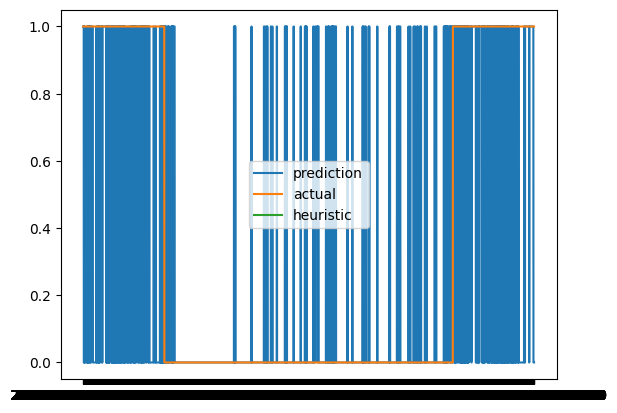

In [41]:
# plot the prediction and the actual value (is_awake) for participant 27
plt.plot(rf_pred['datetime'], rf_pred['prediction'], label='prediction')
plt.plot(rf_pred['datetime'], rf_pred['is_awake'], label='actual')
plt.plot(rf_pred['datetime'], rf_pred['heuristic_pred'], label='heuristic')
plt.legend()
plt.show()

In [42]:
rf_pred

,timestamp,datetime,subject,is_awake,prediction,heuristic_pred
116159,1650167510,2022-04-16 23:51:50,27,1,1,NaN
116160,1650167520,2022-04-16 23:52:00,27,1,1,NaN
116161,1650167530,2022-04-16 23:52:10,27,1,1,NaN
116162,1650167540,2022-04-16 23:52:20,27,1,1,NaN
116163,1650167550,2022-04-16 23:52:30,27,1,1,NaN
...,...,...,...,...,...,...
120151,1650207430,2022-04-17 10:57:10,27,1,0,NaN
120152,1650207440,2022-04-17 10:57:20,27,1,0,NaN
120153,1650207450,2022-04-17 10:57:30,27,1,0,NaN
120154,1650207460,2022-04-17 10:57:40,27,1,0,NaN
